### Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Data Overview

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

#### Importing Libraries

In [0]:
# linear algebra
import numpy as np 
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
import warnings


#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns 


#Setting Instances
sns.set()
%matplotlib inline

import os

warnings.filterwarnings('ignore')

In [307]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##### Importing Data 

In [0]:
train = pd.read_csv("/content/gdrive/My Drive/Python Work/DataSets/titanic/train.csv")
test = pd.read_csv("/content/gdrive/My Drive/Python Work/DataSets/titanic/test.csv")
sub =pd.read_csv("/content/gdrive/My Drive/Python Work/DataSets/titanic/gender_submission.csv")

In [250]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [251]:
# Data types of all columns
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [252]:
# Describing Numerical values in train data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [253]:
# Checking Null Values in data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are **177** null values in **Age**, **687** in Cabin and **2** in Embarked column

In [254]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Feature Engineering

Adding a feature named Title to the both test and train data 

In [0]:
# Defining Function for Adding Title
def Adding_title(data):
  
  
  import re 
  a='Braund, Mr.Owen Harris'
  re.search(' ([A-Z][a-z]+)\.', a).group(1)
  
  data['Title'] = data['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
  
  data['Title'] = data['Title'].replace('Mme', 'Mrs')
  data.loc[(~data['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])), 'Title'] = 'Rare Title'

In [0]:
Adding_title(train)
Adding_title(test)

In [257]:
# Validating Title
print(train.Title.unique(), test.Title.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Rare Title'] ['Mr' 'Mrs' 'Miss' 'Master' 'Rare Title']


In [0]:
#Dropping Names column for both the dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

##### Adding a new feature i.e. Family size 

In [0]:
# Defining function for the addition of family  size column
def fam_size(data):
  data['Fsize'] = data['SibSp'] + data['Parch']+1

In [0]:
fam_size(train)
fam_size(test)

In [261]:
# Validating the change 
print(train.columns, test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Fsize'],
      dtype='object') Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title', 'Fsize'],
      dtype='object')


#### Dealing with null values in both dataframes

In [0]:
# filling Age missing values in train
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)

In [0]:
#Fiiling missing age values in test data
for t in test['Title'].unique():
  for p in train['Pclass'].unique():
      test.loc[(test['Title'] == t) & (test['Pclass']==p) &  (test['Age'].isnull()), 'Age']== test.loc[(test['Title'] == t) & (test['Pclass']==p)  , 'Age'].median()

In [264]:
# Validating the change in data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Fsize            0
dtype: int64

In [265]:
# Unique values in Embarked column
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**S** is the most common value , so we will missing Embarked with **S** in train data

In [0]:
#Filling Embarked value in Train data
train = train.fillna({"Embarked": "S"})

#Filling Fare in test data with o
test = test.fillna({"Fare":0})

In [267]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
Fsize            0
dtype: int64

#### Dropping the Cabin Column because it has too many missing value in both data

In [0]:
train.drop('Cabin', axis=1, inplace = True)
test.drop('Cabin', axis=1, inplace = True)

In [269]:
#Validating The Change in the data now.....

print(train.shape, test.shape)

(891, 12) (418, 11)


In [270]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fsize
0,1,0,3,male,22,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1,1,female,38,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1,3,female,26,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1,1,female,35,1,0,113803,53.1000,S,Mrs,2
4,5,0,3,male,35,0,0,373450,8.0500,S,Mr,1


In [271]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fsize
0,892,3,male,22,0,0,330911,7.8292,Q,Mr,1
1,893,3,female,38,1,0,363272,7.0000,S,Mrs,2
2,894,2,male,26,0,0,240276,9.6875,Q,Mr,1
3,895,3,male,35,0,0,315154,8.6625,S,Mr,1
4,896,3,female,35,1,1,3101298,12.2875,S,Mrs,3


### Visualization

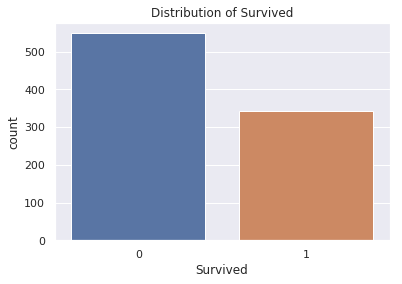

In [272]:
sns.countplot(train.Survived)
plt.title('Distribution of Survived')
plt.show()

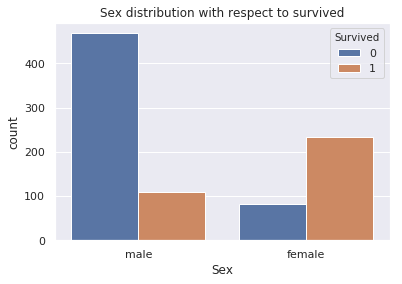

In [273]:
sns.countplot(x='Sex', hue='Survived',data=train)
plt.title('Sex distribution with respect to survived')
plt.show()

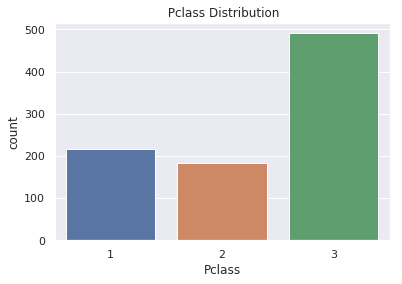

In [274]:
sns.countplot(x='Pclass', data=train)
plt.title(' Pclass Distribution')
plt.show()

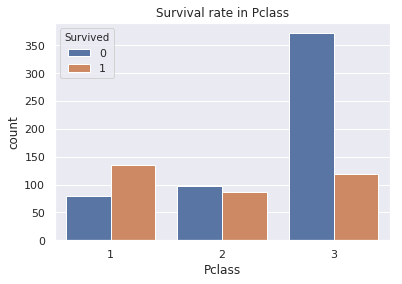

In [275]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival rate in Pclass')
plt.show()

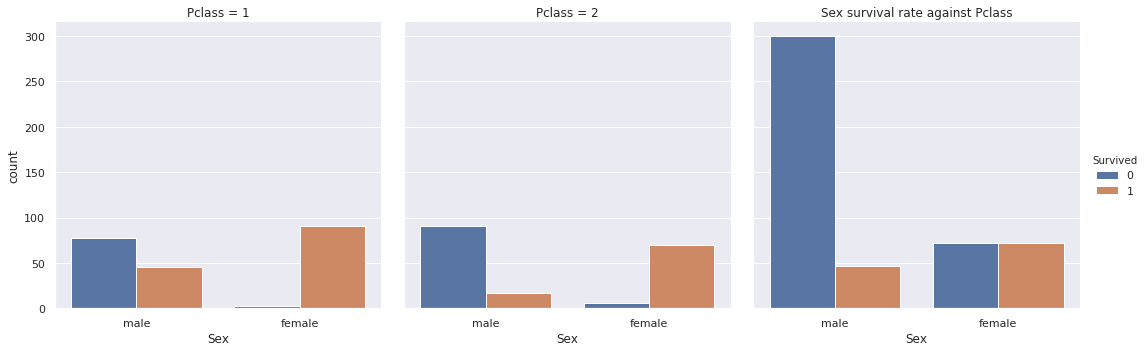

In [276]:

sns.factorplot(x='Sex', col='Pclass',hue='Survived', data=train, kind='count');
plt.title('Sex survival rate against Pclass')
plt.show()

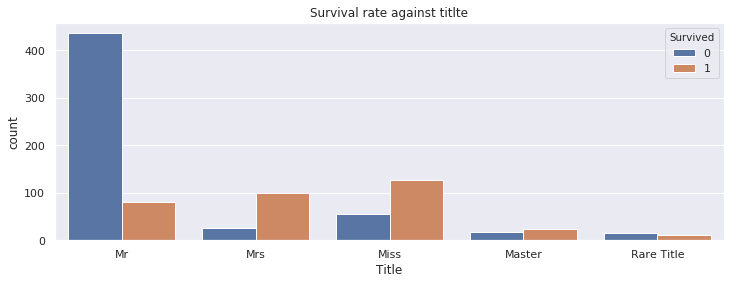

In [277]:
plt.figure(figsize=(12,4))
sns.countplot(x='Title',hue='Survived', data=train)
plt.title('Survival rate against titlte')
plt.show()

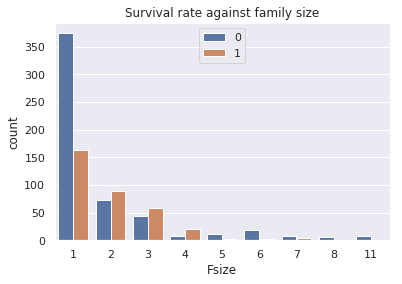

In [278]:
sns.countplot(x='Fsize', hue='Survived', data=train);
plt.title('Survival rate against family size')
plt.legend()
plt.show()

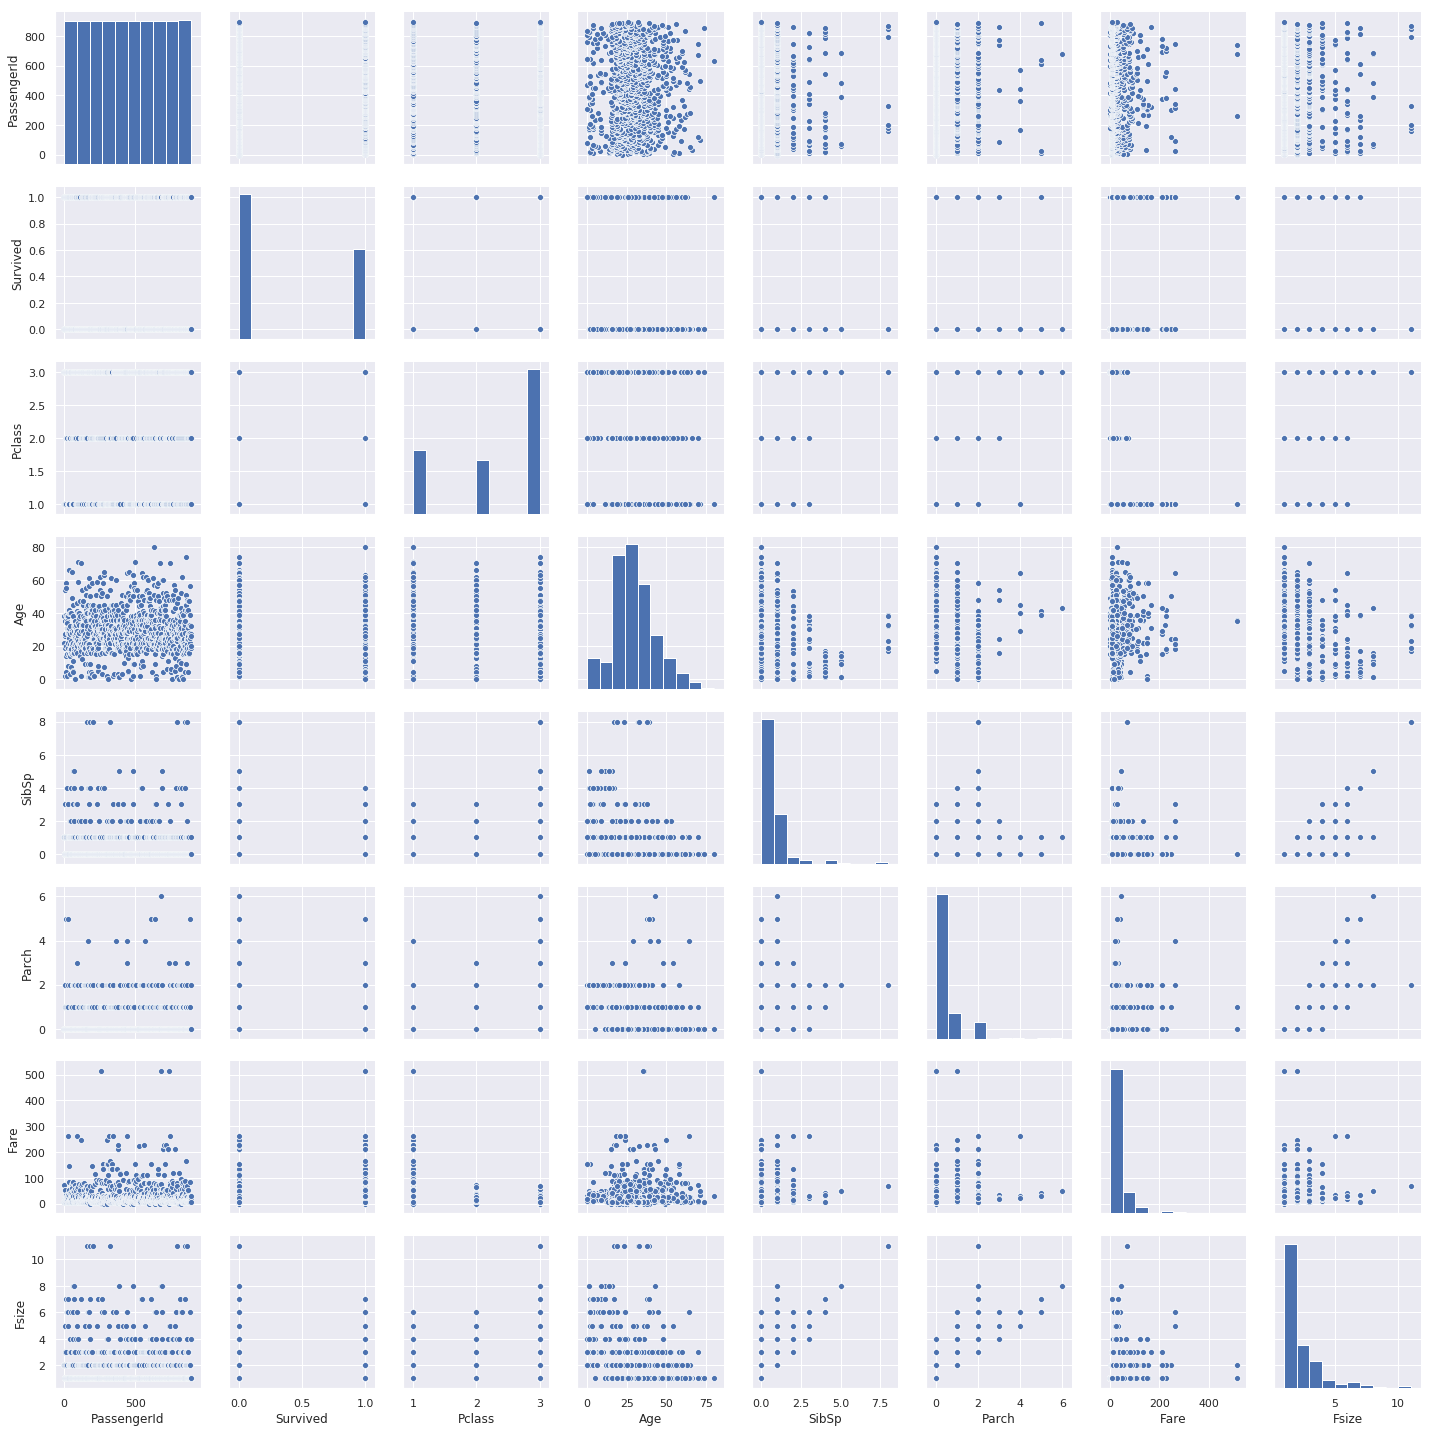

In [279]:
sns.pairplot(train);

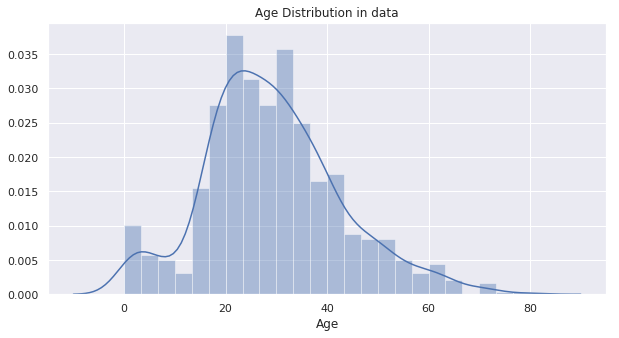

In [280]:
plt.figure(figsize=(10,5))
sns.distplot(train['Age']);
plt.title('Age Distribution in data')
plt.show()

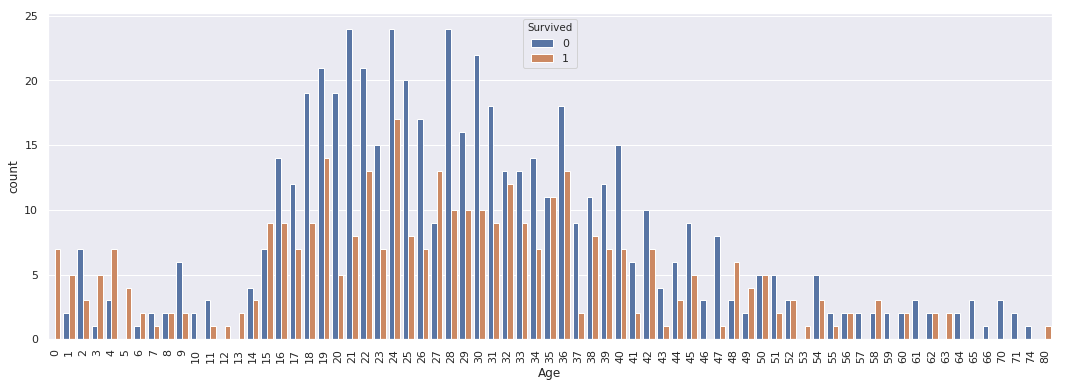

In [281]:
plt.figure(figsize=(18,6))
sns.countplot(x='Age', hue='Survived', data=train)
plt.xticks(rotation=90)
plt.show()

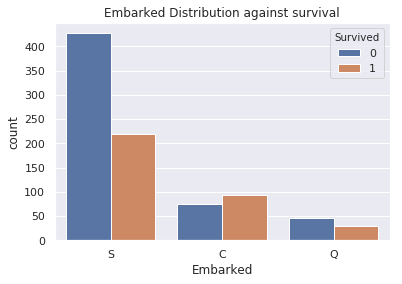

In [282]:
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.title('Embarked Distribution against survival')
plt.show()

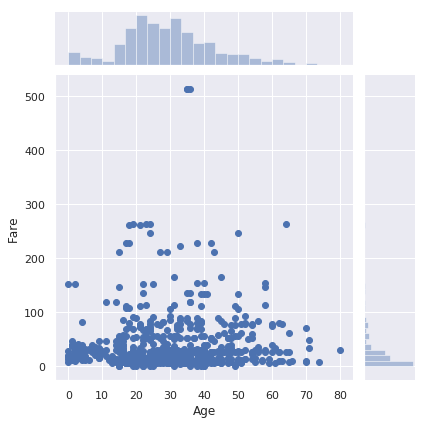

In [283]:
sns.jointplot(x="Age", y="Fare", data=train);

In [0]:
train.drop('PassengerId', axis=1, inplace=True)


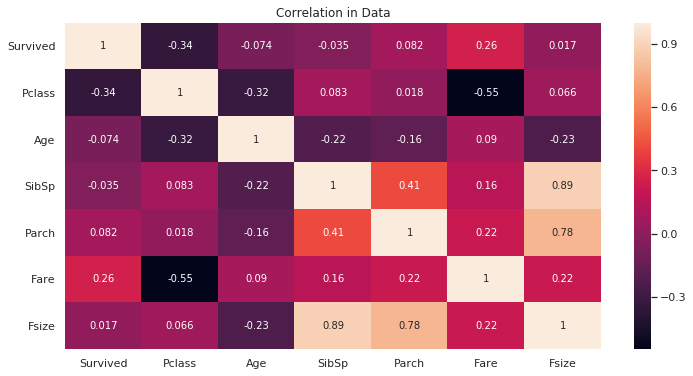

In [285]:
plt.figure(figsize=(12,6))
cor = train.corr()
sns.heatmap(cor, annot=True);
plt.title('Correlation in Data')
plt.show()

#### Encoding Data

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
train= train.apply(LabelEncoder().fit_transform)
test = test.apply(LabelEncoder().fit_transform)

In [288]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fsize
0,0,2,1,22,1,0,523,18,2,2,1
1,1,0,0,38,1,0,596,207,0,3,1
2,1,2,0,26,0,0,669,41,2,1,0
3,1,0,0,35,1,0,49,189,2,3,1
4,0,2,1,35,0,0,472,43,2,2,0


#### Machine Learning Implementation

##### Importing Libraries

In [0]:
#!pip install catboost

In [0]:
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, precision_score, accuracy_score
from sklearn.metrics import recall_score, classification_report, f1_score, roc_curve, auc
import xgboost as xgb
from catboost import CatBoostClassifier, Pool, cv

#### Function for Plotting Roc Curve

In [0]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

#### Splitting Data

In [0]:
X = train.drop('Survived', axis=1)
Y = train['Survived']

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=5, test_size = 0.2)

In [294]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(712, 10) (712,)
(179, 10) (179,)


##### Extreme Gradient Boosting Algorithm

In [0]:
xgb_clf = xgb.XGBClassifier(learning_rate =0.001,n_estimators=11,max_depth=10,min_child_weight=1,subsample=1.0,colsample_bytree=0.55,
                                 reg_alpha=0, nthread=4,seed=5,random_state=5)

In [296]:
xgb_clf.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.55, gamma=0, learning_rate=0.001,
       max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
       n_estimators=11, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=5, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=5, silent=True, subsample=1.0)

In [0]:
xgb_pred = xgb_clf.predict(xtest)
xgb_pproba = xgb_clf.predict_proba(xtest)[:,1]

In [298]:
accuracy_xgb = accuracy_score(ytest,xgb_pred)
print("Accuracy: {}".format(accuracy_xgb))

Accuracy: 0.8603351955307262


In [299]:
print(classification_report(ytest,xgb_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       111
           1       0.85      0.76      0.81        68

   micro avg       0.86      0.86      0.86       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179



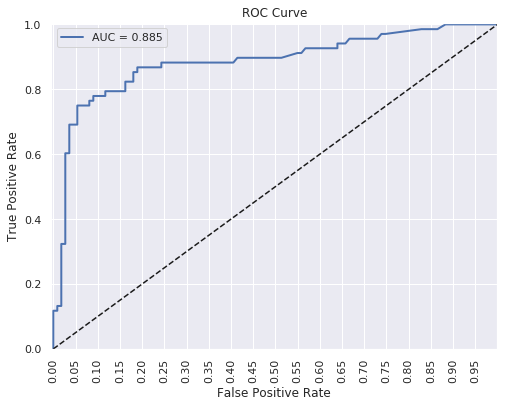

In [300]:
xgb_auc = roc_auc_score(ytest, xgb_pproba)
fpr,tpr,threshold=roc_curve(ytest,xgb_pproba)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% xgb_auc)

In [0]:
features_tuple=list(zip(X.columns,xgb_clf.feature_importances_))
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])
feature_imp=feature_imp.sort_values("Importance",ascending=False)

Text(0.5, 1.0, 'Random Forest Classifier - Features Importance')

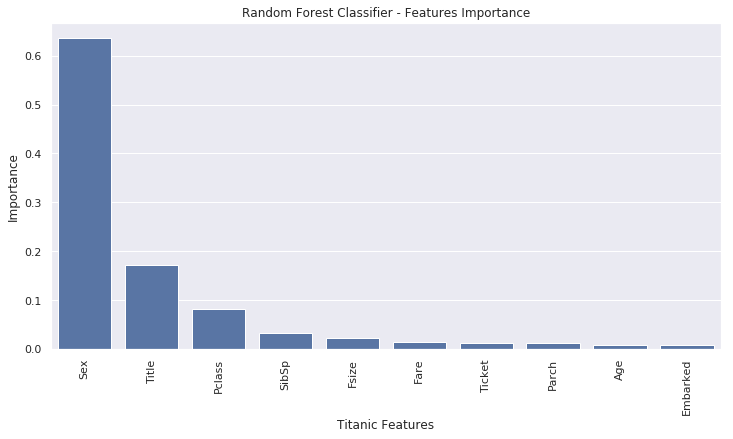

In [302]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Titanic Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Random Forest Classifier - Features Importance")

In [303]:
wanted_tc = xtrain.columns
wanted_tc

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked',
       'Title', 'Fsize'],
      dtype='object')

In [0]:
fpredictions = xgb_clf.predict(test[wanted_tc])

##### Submission File Preparation


In [309]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [310]:
submission = pd.DataFrame()
submission['PassengerId'] = sub['PassengerId']
submission['Survived'] = predictions 
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [0]:
submission.to_csv('/content/gdrive/My Drive/Python Work/DataSets/titanic/Submission.csv', index=False)